In [1]:
#%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
from Earcons import *
import sys
from scipy import interpolate
sys.path.append("..")
sys.path.append('../Viterbi')
from CurvatureTools import *
from SyntheticCurves import *
from Viterbi import getCSM

Speed = pitch ~~~ Distance = amplitude

In [6]:
#load audio sample
fs = 44100
AAO, sr = librosa.load("Obama.wav", sr=fs)
AAT, sr = librosa.load("Autumn Leaves.wav", sr=fs)
AATH, sr = librosa.load("GWY.wav", sr=fs)
AAF, sr = librosa.load("RRW.wav", sr=fs)

#creating figure 8
s = 5
tL = fs * s
t = np.linspace(0, s, tL)
X = getEpicycloid(4, 1, t)
#X = get2DFigure8(t)

#compute velocity
V = getCurvVectors(X, 1, 4, loop=True)[1]
    
#compute Speed
VMag = np.sqrt(np.sum(V**2, axis=1))

#create earcon
'''
#for figure 8
eco = np.array([0.75, 0.75])
ect = np.array([0.75, -0.75])
ecth = np.array([-0.75, -0.75])
ecf = np.array([-0.75, 0.75])
'''
#for epicycloid
eco = np.array([3, 3])
ect = np.array([3, -3])
ecth = np.array([-3, -3])
ecf = np.array([-3, 3])

#compute distance to earcon
do = getCSM(X, eco[None, :]).flatten()
dt = getCSM(X, ect[None, :]).flatten()
dth = getCSM(X, ecth[None, :]).flatten()
df = getCSM(X, ecf[None, :]).flatten()

modfreq = True
modamp = True

A = earcon_audio(AAO,eco,VMag,X,do,s,modfreq,modamp)
B = earcon_audio(AAT,ect,VMag,X,dt,s,modfreq,modamp)
C = earcon_audio(AATH,ecth,VMag,X,dth,s,modfreq,modamp)
D = earcon_audio(AAF,ecf,VMag,X,df,s,modfreq,modamp)

FA = A+B+C+D
OA = AAO + AAT + AATH + AAF

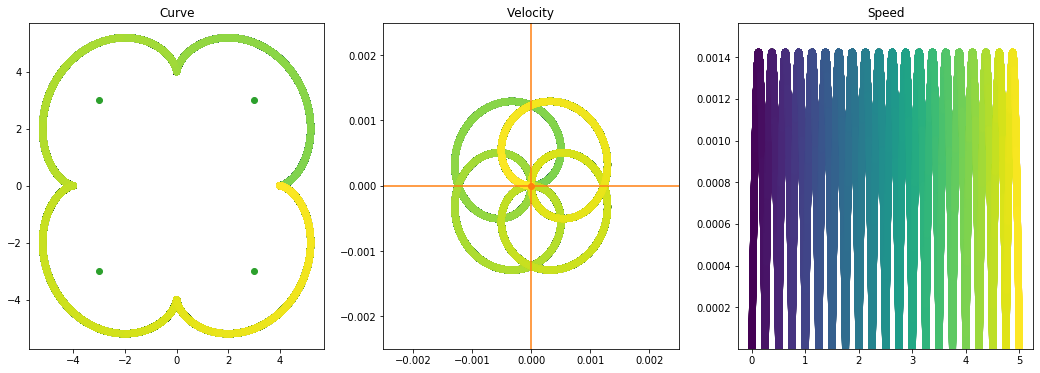

'\n#plot distance\nplt.subplot(111)\nplt.scatter(t, do, c=t)\nplt.title("Distance to earcon 1")\nplt.subplot(122)\nplt.scatter(t, dt, c=t)\nplt.title("Distance to earcon 2")\nplt.subplot(211)\nplt.scatter(t, dth, c=t)\nplt.title("Distance to earcon 3")\nplt.subplot(222)\nplt.scatter(t, df, c=t)\nplt.title("Distance to earcon 4")\n\n\n#plot audio and mods\nplt.figure()\nplt.subplot(311)\nplt.plot(AS)\nplt.title("Original Audio")\nplt.subplot(312)\nplt.plot(FMAS)\nplt.title("Freq Modded Audio")\nplt.subplot(313)\nplt.plot(FAMAS)\n'

In [7]:
#plot figure 8
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=t)
plt.scatter([eco[0]], [eco[1]], c='C2')
plt.scatter([ect[0]], [ect[1]], c='C2')
plt.scatter([ecth[0]], [ecth[1]], c='C2')
plt.scatter([ecf[0]], [ecf[1]], c='C2')
plt.title("Curve")

#plot velocity

plt.subplot(132)
plt.scatter(V[:, 0], V[:, 1], c=t)
plt.scatter([0], [0], c='C1')
plt.plot([-0.0025, 0.0025], [0, 0], c='C1')
plt.plot([0, 0], [-0.0025, 0.0025], c='C1')
plt.xlim(-0.0025,0.0025)
plt.ylim(-0.0025,0.0025)
plt.title("Velocity")


'''
#velocity for figure 8
plt.subplot(132)
plt.scatter(V[:, 0], V[:, 1], c=t)
plt.scatter([0], [0], c='C1')
plt.plot([-0.0005, 0.0005], [0, 0], c='C1')
plt.plot([0, 0], [-0.0006, 0.0006], c='C1')
plt.xlim(-0.0005,0.0005)
plt.ylim(-0.0006,0.0006)
plt.title("Velocity")
'''

#plot speed
plt.subplot(133)
plt.scatter(t, VMag, c=t)
plt.ylim(np.min(VMag)/1.1,np.max(VMag)*1.1)
plt.title("Speed")

plt.show()

'''
#plot distance
plt.subplot(111)
plt.scatter(t, do, c=t)
plt.title("Distance to earcon 1")
plt.subplot(122)
plt.scatter(t, dt, c=t)
plt.title("Distance to earcon 2")
plt.subplot(211)
plt.scatter(t, dth, c=t)
plt.title("Distance to earcon 3")
plt.subplot(222)
plt.scatter(t, df, c=t)
plt.title("Distance to earcon 4")


#plot audio and mods
plt.figure()
plt.subplot(311)
plt.plot(AS)
plt.title("Original Audio")
plt.subplot(312)
plt.plot(FMAS)
plt.title("Freq Modded Audio")
plt.subplot(313)
plt.plot(FAMAS)
'''

In [8]:
#Modulated Audio
ipd.Audio(FA, rate=fs)

In [9]:
#Audio
ipd.Audio(OA, rate=fs)